In [1]:
import pickle
import numpy as np
import umap
import matplotlib.pyplot as plt

In [2]:
filename = 'glove_6B/glove2word2vec_model.sav'
with open(filename, 'rb') as file:
    model = pickle.load(file)

# Extract word vectors from the model
word_vectors = model

In [3]:
words_of_interest = ["beach", "ocean", "sun", "sand", "waves"]

# Remove missing words and duplicates from the list
unique_words_of_interest = list(set(words_of_interest).intersection(model.key_to_index))

# Retrieve the word vectors for the selected words
vectors_of_interest = [model[word] for word in words_of_interest if word in model.key_to_index]

if not vectors_of_interest:
    print("No valid word vectors found. Please check your input data.")
else:
    reducer = umap.UMAP(n_neighbors=100)
    umap_embeddings = reducer.fit_transform(vectors_of_interest)

/Users/AprilCoffee/opt/anaconda3/envs/tf_cpu/lib/python3.7/site-packages/umap/umap_.py:2434: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


In [4]:

def drawPlt(umap_embeddings, words_of_interest, highlight_words=None):
    # Create a scatter plot of the UMAP embeddings
    plt.figure(figsize=(10, 8))
    
    # Initialize colors for all points as blue
    point_colors = ['blue'] * len(words_of_interest)
    
    # Change the color for highlighted words to red
    if highlight_words:
        for i, word in enumerate(words_of_interest):
            if word in highlight_words:
                point_colors[i] = 'red'
    
    # Scatter plot all words with smaller circles and updated colors
    plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], marker='.', s=20, c=point_colors, alpha=0.5)
    
    # Annotate points with words
    for i, word in enumerate(words_of_interest):
        if i < umap_embeddings.shape[0]:  # Check if the index is within bounds
            plt.annotate(word, (umap_embeddings[i, 0], umap_embeddings[i, 1]), fontsize=10)
    
    plt.title("UMAP Visualization of GloVe Word Embeddings")
    plt.xlabel("")
    plt.ylabel("")
    plt.show()


In [23]:
from sklearn.metrics.pairwise import cosine_similarity

# Choose a target word
target_word = "ocean"
words_of_interest = []
words_of_interest.append(target_word)
# Ensure the target word is in the vocabulary
if target_word in model.key_to_index:
    # Get the vector for the target word
    target_vector = model[target_word].reshape(1, -1)

    # Calculate cosine similarities between the target word and all other words
    similarities = cosine_similarity(target_vector, model.vectors)

    # Find the top N similar words (excluding the target word itself)
    top_n = 200  # Adjust as needed
    similar_word_indices = similarities.argsort()[0][-top_n - 1:-1][::-1]

    # Get the similar words and their similarity scores
    similar_words = [model.index_to_key[i] for i in similar_word_indices]
    similarity_scores = [similarities[0][i] for i in similar_word_indices]
    words_of_interest.extend(similar_words)

    # Print the similar words and their similarity scores
    #for word, score in zip(similar_words, similarity_scores):
    #    print(f"{word}: {score:.4f}")
#else:
#    print(f"{target_word} is not in the vocabulary.")


In [24]:
vectors_of_interest = [model[word] for word in words_of_interest if word in model.key_to_index]

if not vectors_of_interest:
    print("No valid word vectors found. Please check your input data.")
else:
    reducer = umap.UMAP(n_neighbors=10000)
    umap_embeddings = reducer.fit_transform(vectors_of_interest)

/Users/AprilCoffee/opt/anaconda3/envs/tf_cpu/lib/python3.7/site-packages/umap/umap_.py:2434: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  "n_neighbors is larger than the dataset size; truncating to "


In [25]:
#drawPlt(umap_embeddings,words_of_interest,target_word)

In [26]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

# Assuming you have loaded GloVe embeddings and vectors_of_interest
# vectors_of_interest is a list of word vectors

# Number of clusters (you can adjust this)
num_clusters = 20

# Normalize the word vectors (important for K-Means)
normalized_vectors = normalize(vectors_of_interest)

# Initialize and fit K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(normalized_vectors)

# Get the cluster labels for each word vector
cluster_labels = kmeans.labels_

# Print the words and their respective clusters
#for word, cluster in zip(words_of_interest, cluster_labels):
#    print(f"{word}: Cluster {cluster}")

# Analyze and visualize the clusters as needed


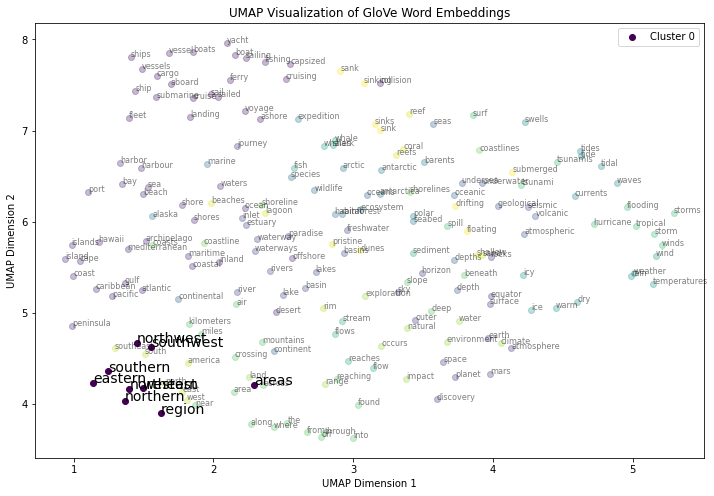

Cluster 0 Labels: northeast, southern, southwest, northwest, western, northern, areas, region, eastern
Cluster 1 Labels: boat, ship, vessel, fishing, boats, sail, sailing, ships, voyage, ashore, vessels, submarine, cruising, aboard, cruise, fleet, landing, sailed, collision, cargo, ferry, capsized, yacht
Cluster 2 Labels: ocean, sea, waters, coast, atlantic, pacific, coastal, shores, shore, mediterranean, islands, island, inland, caribbean, harbor, gulf, cape, beach, archipelago, offshore, maritime, desert, harbour, peninsula, bay, hawaii, port
Cluster 3 Labels: earth, surface, horizon, planet, discovery, mars, sky, space, outer, paradise, atmosphere, rocks, equator, journey
Cluster 4 Labels: basin, lakes, lake, river, rivers, waterways, estuary, inlet, basins, freshwater, waterway
Cluster 5 Labels: underwater, undersea, atmospheric, seismic, geological, depth, volcanic
Cluster 6 Labels: seas, oceans, depths, oceanic, continental, continent
Cluster 7 Labels: marine, rainforest, ecosyst

In [27]:
import matplotlib.pyplot as plt
import umap
import numpy as np

def drawPlt(umap_embeddings, words_of_interest, target_word, cluster_labels, focus_cluster=None, opacity=0.5, label_opacity=1.0, label_size=12):
    # Create a scatter plot of UMAP embeddings
    plt.figure(figsize=(12, 8))

    # Define unique colors for each cluster
    unique_clusters = set(cluster_labels)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_clusters)))

    # Lists to store cluster labels
    cluster_label_lists = [[] for _ in range(len(unique_clusters))]

    # Plot points in focus cluster with full opacity
    for cluster in unique_clusters:
        mask = cluster_labels == cluster
        if cluster == focus_cluster:
            plt.scatter(
                umap_embeddings[mask, 0], umap_embeddings[mask, 1],
                label=f"Cluster {cluster}", color=colors[cluster], alpha=1.0
            )
            label_alpha = 1.0  # Full opacity for labels of the focus cluster
            label_size_cluster = label_size  # Adjust label size for the focus cluster
        else:
            plt.scatter(
                umap_embeddings[mask, 0], umap_embeddings[mask, 1],
                color=colors[cluster], alpha=opacity
            )
            label_alpha = label_opacity  # Adjusted opacity for labels of other clusters
            label_size_cluster = 8  # Smaller label size for other clusters

        # Annotate points with words and set label opacity and size
        for i, word in enumerate(words_of_interest):
            if cluster_labels[i] == cluster:
                plt.annotate(word, (umap_embeddings[i, 0], umap_embeddings[i, 1]), alpha=label_alpha, fontsize=label_size_cluster)
                cluster_label_lists[cluster].append(word)

    plt.title("UMAP Visualization of GloVe Word Embeddings")
    plt.xlabel("UMAP Dimension 1")
    plt.ylabel("UMAP Dimension 2")
    plt.legend()

    # Save the plot as an image file
    plt.savefig("cluster_visualization.png", dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

    # Return the cluster label lists
    return cluster_label_lists

# Assuming you have 'umap_embeddings', 'words_of_interest', 'target_word', 'cluster_labels', and 'focus_cluster'
# 'cluster_labels' should contain the cluster labels for each word in 'words_of_interest'
# 'focus_cluster' should be the cluster number you want to highlight with full opacity

# Call drawPlt with UMAP embeddings, words_of_interest, cluster_labels, and focus_cluster
cluster_label_lists = drawPlt(umap_embeddings, words_of_interest, target_word, cluster_labels, focus_cluster=0, opacity=0.3, label_opacity=0.5, label_size=14)

# cluster_label_lists will contain lists of labels for each cluster
for cluster, labels in enumerate(cluster_label_lists):
    print(f"Cluster {cluster} Labels: {', '.join(labels)}")


In [28]:
cluster_label_lists[0]

['northeast',
 'southern',
 'southwest',
 'northwest',
 'western',
 'northern',
 'areas',
 'region',
 'eastern']

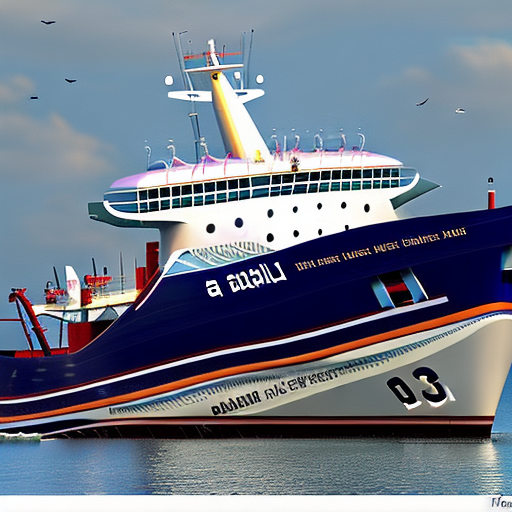

In [32]:
# Setting up enviornment
from base64 import b64decode
from pathlib import Path
import os
import io
import warnings
from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation
import api_key


os.environ['STABILITY_HOST'] = 'grpc.stability.ai:443'
os.environ['STABILITY_KEY'] = api_key.dreamStudio_key()

# Set up our connection to the API.
# select the engine using. (possible for stable diffusion 2)

stability_api = client.StabilityInference(
    key=os.environ['STABILITY_KEY'], # API Key reference.
    verbose=True, # Print debug messages.
    engine="stable-diffusion-768-v2-1", # Set the engine to use for generation. 
)


# Set up our initial generation parameters.
answers = stability_api.generate(
    prompt=','.join(cluster_label_lists[1]),
    width=512, # Generation width, defaults to 512 if not included.
    height=512, # Generation height, defaults to 512 if not included.
)


IMAGE_DIR = Path.cwd() / "StableDiffusion_images"
IMAGE_DIR.mkdir(parents=True, exist_ok=True)

fileName = "image.png"
for resp in answers:
    for artifact in resp.artifacts:
        if artifact.type == generation.ARTIFACT_IMAGE:
            image_file = IMAGE_DIR / fileName
            img = Image.open(io.BytesIO(artifact.binary))
            img.save(image_file) # Save our generated images with their seed number as the filename.
            
display(img)